### 인구 이동

[백준 링크](https://www.acmicpc.net/problem/16234) []

+ NxN 크기의 땅이 있고, 땅은 1x1개의 칸으로 나누어져 있음
+ 각각의 땅에는 나라가 하나씩 존재하며, r행 c열에 있는 나라에는 A[r][c]명이 살고 있음
+ 인접한 나라 사이에는 국경선 존재
+ 모든 나라는 1x1 크기이기 때문에 모든 국경선은 정사각형 형태

+ 오늘부터 인구 이동이 시작되는 날
+ 인구 이동은 다음과 같이 진행되고, 더 이상 아래 방법에 의해 인구 이동이 없을 때까지 지속됨
  + 국경선을 공유하는 두 나라의 인구 차이가 L명 이상, R명 이하라면, 두 나라가 공유하는 국경선을 오늘 하루동안 엶
  + 위의 조건에 의해 열어야 하는 국경선이 모두 열렸다면, 인구 이동을 시작함
  + 국경선이 열려 있어 인접한 칸만을 이용해 이동할 수 있으면, 그 나라를 오늘 하루 동안은 연합이라고 함
  + 연합을 이루고 있는 각 칸의 인구수는 (연합의 인구수) / (연합을 이루고 있는 칸의 개수)가 됨 (편의상 소수점 버림)
  + 연합을 해체하고, 모든 국경선을 닫음

+ 각 나라의 인구수가 주어졌을 때, 인구 이동이 몇 번 발생하는지 구하는 프로그램 작성하기

**입력 조건**  
+ 첫째 줄에 N, L, R이 주어짐 (1 <= N <= 50, 1 <= L <= R <= 100)
+ 둘째 줄부터 N개의 줄에 각 나라의 인구수가 주어짐  
  r행 c열에 주어지는 정수는 A[r][c]의 값임 (0 <= A[r][c] <= 100)
+ 인구 이동이 발생하는 횟수가 2000번보다 작거나 같은 입력만 주어짐

**출력 조건**  
+ 인구 이동이 몇 번 발생하는지 첫째 줄에 출력하기

**입력 예시 1**  
2 20 50  
50 30  
20 40  

**출력 예시 1**  
1  

**입력 예시 2**  
2 40 50  
50 30  
20 40  

**출력 예시 2**  
0  

**입력 예시 3**  
2 20 50  
50 30  
30 40  

**출력 예시 3**  
1  

**입력 예시 4**  
3 5 10  
10 15 20  
20 30 25  
40 22 10  

**출력 예시 4**  
2  

**입력 예시 5**  
4 10 50  
10 100 20 90  
80 100 60 70  
70 20 30 40  
50 20 100 10  

**출력 예시 5**  
3  


In [23]:
from collections import deque

n, l, r = map(int, input().split()) # 땅의크기와 l명이상 r명이하의 인구차이

graph = []
for _ in range(n):
    graph.append(list(map(int, input().split())))

2 20 50
50 30
20 40


In [24]:
graph

[[50, 30], [20, 40]]

In [25]:
dx = [-1, 0, 1, 0]
dy = [0, -1, 0, 1]

result = 0

In [26]:
# 특정 위치에서 출발하여 모든 연합을 체크한 뒤에 데이터 갱신
def process(x, y, index):
    # (x, y)의 위치와 연결된 나라(연합) 정보를 담는 리스트
    united = []
    united.append((x, y))
    # 너비 우선 탐색(BFS)를 위한 큐 자료구조 정의
    q = deque()
    q.append((x, y))
    union[x][y] = index # 현재 연합의 번호 할당
    summary = graph[x][y] # 현재 연합의 전체 인구 수
    count = 1 # 현재 연합의 국가 수
    # 큐가 빌 때까지 반복(BFS)
    while q:
        x, y = q.popleft()
        # 현재 위치에서 4가지 방향을 확인하며 
        for i in range(4):
            nx = x + dx[i]
            ny = y + dy[i]
            # 바로 옆에 있는 나라를 확인하여
            if 0 <= nx < n and 0 <= ny < n and union[nx][ny] == -1:
                # 옆에 있는 나라와 인구 차이가 L명 이상, R명 이하라면
                if l <= abs(graph[nx][ny] - graph[x][y]) <= r:
                    q.append((nx, ny))
                    # 연합에 추가
                    union[nx][ny] = index
                    summary += graph[nx][ny]
                    count += 1
                    united.append((nx, ny))

    # 연합 국가끼리 인구를 분배
    for i, j in united:
        graph[i][j] = summary // count
        return count

In [27]:
total_count = 0

# 더 이상 인구 이동을 할 수 없을 때까지 반복
while True:
    union = [[-1] * n for _ in range(n)]
    index = 0
    for i in range(n):
        for j in range(n):
            if union[i][j] == -1: # 해당 나라가 아직 처리되지 않았다면
                process(i, j, index)
                index += 1
    if index == n * n: # 모든 인구 이동이 끝난 경우
        break
    total_count += 1
            
print(total_count) # 인구 이동 횟수 출력

2


In [35]:
from collections import deque

n, l, r = map(int, input().split()) # 땅의크기와 l명이상 r명이하의 인구차이

graph = []
for _ in range(n):
    graph.append(list(map(int, input().split())))
    
dx = [-1, 0, 1, 0]
dy = [0, -1, 0, 1]

result = 0

# 특정 위치에서 출발하여 모든 연합을 체크한 뒤에 데이터 갱신
def process(x, y, index):
    # (x, y)의 위치와 연결된 나라(연합) 정보를 담는 리스트
    united = []
    united.append((x, y))
    # 너비 우선 탐색(BFS)를 위한 큐 자료구조 정의
    q = deque()
    q.append((x, y))
    union[x][y] = index # 현재 연합의 번호 할당
    summary = graph[x][y] # 현재 연합의 전체 인구 수
    count = 1 # 현재 연합의 국가 수
    # 큐가 빌 때까지 반복(BFS)
    while q:
        x, y = q.popleft()
        # 현재 위치에서 4가지 방향을 확인하며 
        for i in range(4):
            nx = x + dx[i]
            ny = y + dy[i]
            # 바로 옆에 있는 나라를 확인하여
            if 0 <= nx < n and 0 <= ny < n and union[nx][ny] == -1:
                # 옆에 있는 나라와 인구 차이가 L명 이상, R명 이하라면
                if l <= abs(graph[nx][ny] - graph[x][y]) <= r:
                    q.append((nx, ny))
                    # 연합에 추가
                    union[nx][ny] = index
                    summary += graph[nx][ny]
                    count += 1
                    united.append((nx, ny))

    # 연합 국가끼리 인구를 분배
    for i, j in united:
        graph[i][j] = summary // count
    return count
    

total_count = 0

# 더 이상 인구 이동을 할 수 없을 때까지 반복
while True:
    union = [[-1] * n for _ in range(n)]
    index = 0
    for i in range(n):
        for j in range(n):
            if union[i][j] == -1: # 해당 나라가 아직 처리되지 않았다면
                process(i, j, index)
                index += 1
    if index == n * n: # 모든 인구 이동이 끝난 경우
        break
    total_count += 1
            
print(total_count) # 인구 이동 횟수 출력

2 20 50
50 30
20 40
1


In [34]:
from collections import deque

n, l, r = map(int, input().split()) # 땅의크기와 l명이상 r명이하의 인구차이

graph = []
for _ in range(n):
    graph.append(list(map(int, input().split())))
    
dx = [-1, 0, 1, 0]
dy = [0, -1, 0, 1]

result = 0

# 특정 위치에서 출발하여 모든 연합을 체크한 뒤에 데이터 갱신
def process(x, y, index):
    # (x, y)의 위치와 연결된 나라(연합) 정보를 담는 리스트
    united = []
    united.append((x, y))
    # 너비 우선 탐색(BFS)를 위한 큐 자료구조 정의
    q = deque()
    q.append((x, y))
    union[x][y] = index # 현재 연합의 번호 할당
    summary = graph[x][y] # 현재 연합의 전체 인구 수
    count = 1 # 현재 연합의 국가 수
    # 큐가 빌 때까지 반복(BFS)
    while q:
        x, y = q.popleft()
        # 현재 위치에서 4가지 방향을 확인하며 
        for i in range(4):
            nx = x + dx[i]
            ny = y + dy[i]
            # 바로 옆에 있는 나라를 확인하여
            if 0 <= nx < n and 0 <= ny < n and union[nx][ny] == -1:
                # 옆에 있는 나라와 인구 차이가 L명 이상, R명 이하라면
                if l <= abs(graph[nx][ny] - graph[x][y]) <= r:
                    q.append((nx, ny))
                    # 연합에 추가
                    union[nx][ny] = index
                    summary += graph[nx][ny]
                    count += 1
                    united.append((nx, ny))

    # 연합 국가끼리 인구를 분배
    for i, j in united:
        graph[i][j] = summary // count
    return count
    

total_count = 0

# 더 이상 인구 이동을 할 수 없을 때까지 반복
while True:
    union = [[-1] * n for _ in range(n)]
    index = 0
    for i in range(n):
        for j in range(n):
            if union[i][j] == -1: # 해당 나라가 아직 처리되지 않았다면
                process(i, j, index)
                index += 1
    if index == n * n: # 모든 인구 이동이 끝난 경우
        break
    total_count += 1
            
print(total_count) # 인구 이동 횟수 출력

2 40 50
50 30
20 40
0


In [36]:
from collections import deque

n, l, r = map(int, input().split()) # 땅의크기와 l명이상 r명이하의 인구차이

graph = []
for _ in range(n):
    graph.append(list(map(int, input().split())))
    
dx = [-1, 0, 1, 0]
dy = [0, -1, 0, 1]

result = 0

# 특정 위치에서 출발하여 모든 연합을 체크한 뒤에 데이터 갱신
def process(x, y, index):
    # (x, y)의 위치와 연결된 나라(연합) 정보를 담는 리스트
    united = []
    united.append((x, y))
    # 너비 우선 탐색(BFS)를 위한 큐 자료구조 정의
    q = deque()
    q.append((x, y))
    union[x][y] = index # 현재 연합의 번호 할당
    summary = graph[x][y] # 현재 연합의 전체 인구 수
    count = 1 # 현재 연합의 국가 수
    # 큐가 빌 때까지 반복(BFS)
    while q:
        x, y = q.popleft()
        # 현재 위치에서 4가지 방향을 확인하며 
        for i in range(4):
            nx = x + dx[i]
            ny = y + dy[i]
            # 바로 옆에 있는 나라를 확인하여
            if 0 <= nx < n and 0 <= ny < n and union[nx][ny] == -1:
                # 옆에 있는 나라와 인구 차이가 L명 이상, R명 이하라면
                if l <= abs(graph[nx][ny] - graph[x][y]) <= r:
                    q.append((nx, ny))
                    # 연합에 추가
                    union[nx][ny] = index
                    summary += graph[nx][ny]
                    count += 1
                    united.append((nx, ny))

    # 연합 국가끼리 인구를 분배
    for i, j in united:
        graph[i][j] = summary // count
    return count
    

total_count = 0

# 더 이상 인구 이동을 할 수 없을 때까지 반복
while True:
    union = [[-1] * n for _ in range(n)]
    index = 0
    for i in range(n):
        for j in range(n):
            if union[i][j] == -1: # 해당 나라가 아직 처리되지 않았다면
                process(i, j, index)
                index += 1
    if index == n * n: # 모든 인구 이동이 끝난 경우
        break
    total_count += 1
            
print(total_count) # 인구 이동 횟수 출력

2 20 50
50 30
30 40
1


In [37]:
from collections import deque

n, l, r = map(int, input().split()) # 땅의크기와 l명이상 r명이하의 인구차이

graph = []
for _ in range(n):
    graph.append(list(map(int, input().split())))
    
dx = [-1, 0, 1, 0]
dy = [0, -1, 0, 1]

result = 0

# 특정 위치에서 출발하여 모든 연합을 체크한 뒤에 데이터 갱신
def process(x, y, index):
    # (x, y)의 위치와 연결된 나라(연합) 정보를 담는 리스트
    united = []
    united.append((x, y))
    # 너비 우선 탐색(BFS)를 위한 큐 자료구조 정의
    q = deque()
    q.append((x, y))
    union[x][y] = index # 현재 연합의 번호 할당
    summary = graph[x][y] # 현재 연합의 전체 인구 수
    count = 1 # 현재 연합의 국가 수
    # 큐가 빌 때까지 반복(BFS)
    while q:
        x, y = q.popleft()
        # 현재 위치에서 4가지 방향을 확인하며 
        for i in range(4):
            nx = x + dx[i]
            ny = y + dy[i]
            # 바로 옆에 있는 나라를 확인하여
            if 0 <= nx < n and 0 <= ny < n and union[nx][ny] == -1:
                # 옆에 있는 나라와 인구 차이가 L명 이상, R명 이하라면
                if l <= abs(graph[nx][ny] - graph[x][y]) <= r:
                    q.append((nx, ny))
                    # 연합에 추가
                    union[nx][ny] = index
                    summary += graph[nx][ny]
                    count += 1
                    united.append((nx, ny))

    # 연합 국가끼리 인구를 분배
    for i, j in united:
        graph[i][j] = summary // count
    return count
    

total_count = 0

# 더 이상 인구 이동을 할 수 없을 때까지 반복
while True:
    union = [[-1] * n for _ in range(n)]
    index = 0
    for i in range(n):
        for j in range(n):
            if union[i][j] == -1: # 해당 나라가 아직 처리되지 않았다면
                process(i, j, index)
                index += 1
    if index == n * n: # 모든 인구 이동이 끝난 경우
        break
    total_count += 1
            
print(total_count) # 인구 이동 횟수 출력

3 5 10
10 15 20
20 30 25
40 22 10
2


In [38]:
from collections import deque

n, l, r = map(int, input().split()) # 땅의크기와 l명이상 r명이하의 인구차이

graph = []
for _ in range(n):
    graph.append(list(map(int, input().split())))
    
dx = [-1, 0, 1, 0]
dy = [0, -1, 0, 1]

result = 0

# 특정 위치에서 출발하여 모든 연합을 체크한 뒤에 데이터 갱신
def process(x, y, index):
    united = [] # (x, y)의 위치와 연결된 나라(연합) 정보를 담기
    united.append((x, y))
    # 너비 우선 탐색(BFS)를 위한 큐 자료구조 정의
    q = deque()
    q.append((x, y))
    union[x][y] = index # 현재 연합의 번호 할당
    summary = graph[x][y] # 현재 연합의 전체 인구 수
    count = 1 # 현재 연합의 국가 수
    # 큐가 빌 때까지 반복(BFS)
    while q:
        x, y = q.popleft()
        # 현재 위치에서 4가지 방향을 확인하며 
        for i in range(4):
            nx = x + dx[i]
            ny = y + dy[i]
            # 바로 옆에 있는 나라를 확인하여
            if 0 <= nx < n and 0 <= ny < n and union[nx][ny] == -1:
                # 옆에 있는 나라와 인구 차이가 L명 이상, R명 이하라면
                if l <= abs(graph[nx][ny] - graph[x][y]) <= r:
                    q.append((nx, ny))
                    # 연합에 추가
                    union[nx][ny] = index
                    summary += graph[nx][ny]
                    count += 1
                    united.append((nx, ny))

    # 연합 국가끼리 인구를 분배
    for i, j in united:
        graph[i][j] = summary // count
    return count
    

total_count = 0

# 더 이상 인구 이동을 할 수 없을 때까지 반복
while True:
    union = [[-1] * n for _ in range(n)]
    index = 0
    for i in range(n):
        for j in range(n):
            if union[i][j] == -1: # 해당 나라가 아직 처리되지 않았다면
                process(i, j, index)
                index += 1
    if index == n * n: # 모든 인구 이동이 끝난 경우
        break
    total_count += 1
            
print(total_count) # 인구 이동 횟수 출력

4 10 50
10 100 20 90
80 100 60 70
70 20 30 40
50 20 100 10
3


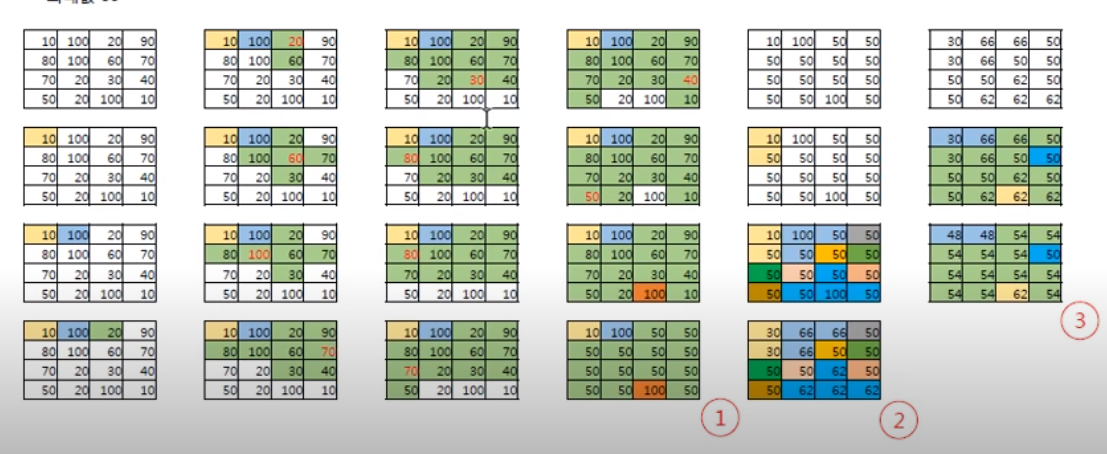